# 导入库和数据集

In [1]:
import numpy as np
import pandas as pd
df_bank = pd.read_csv("BankCustomer.csv")
df_bank.head()

,Name,Gender,Age,City,Tenure,ProductsNo,HasCard,ActiveMember,Credit,AccountBal,Salary,Exited
0,Kan Jian,Female,40,Beijing,9,2,0,1,516,6360.66,0.0000,0
1,Xue Baochai,Male,69,Beijing,6,2,0,1,682,28605.00,0.0000,0
2,Mao Xi,Female,32,Beijing,9,1,1,1,803,10378.09,236311.0932,1
3,Zheng Nengliang,Female,37,Tianjin,0,2,1,1,778,25564.01,129909.8079,1
4,Zhi Fen,Male,55,Tianjin,4,3,1,0,547,3235.61,136976.1948,1


# 观察数据特点

C:\Users\Demeter\AppData\Local\Temp\ipykernel_12364\1990372777.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, i+1)


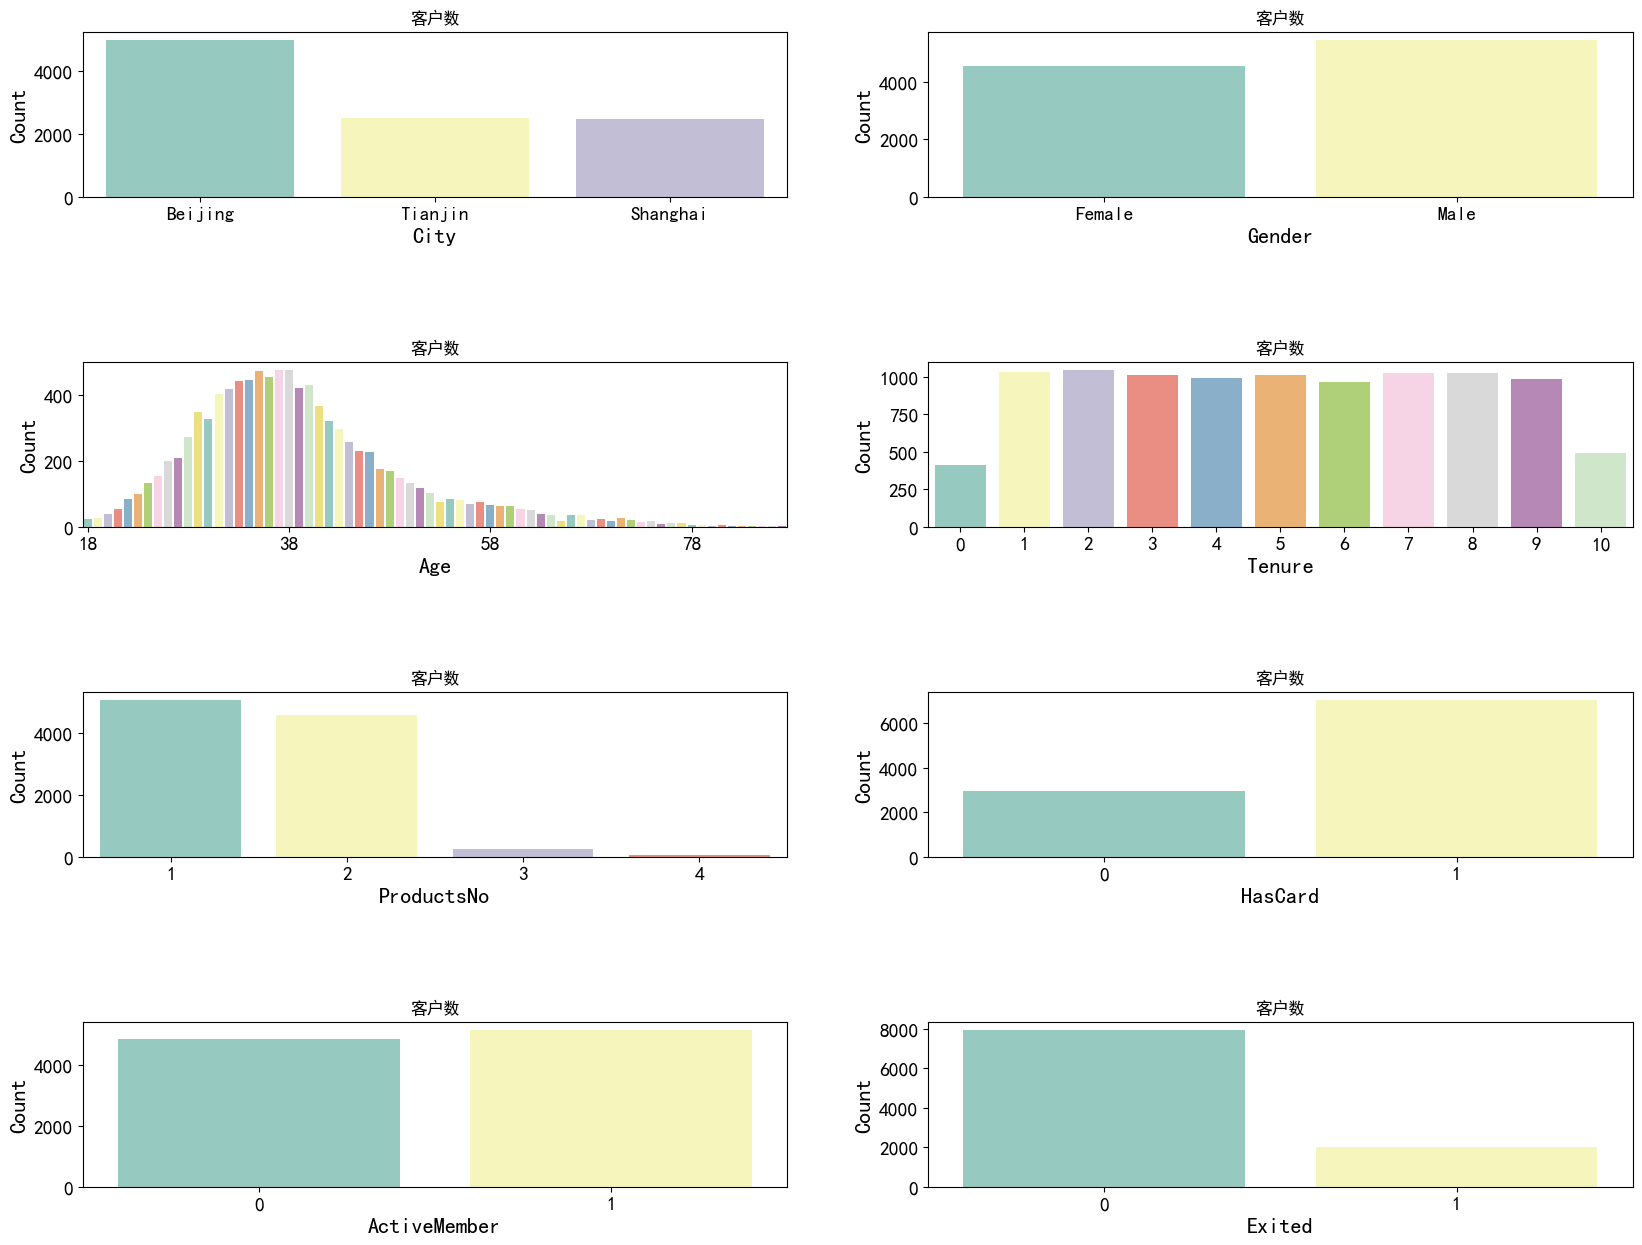

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline    
# matplotlib魔术指令，显示内嵌图像
plt.rcParams["font.sans-serif"] = ["SimHei"] #解决中文字符乱码的问题
plt.rcParams["axes.unicode_minus"] = False #正常显示负号
# 显示不同特征分布情况
features = ["City", "Gender", "Age", "Tenure", "ProductsNo", "HasCard", "ActiveMember", "Exited" ]
fig = plt.subplots(figsize=(20, 15))
for i,j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    ax = sns.countplot(x = j, data = df_bank, hue = j, palette="Set3", legend = False)
    # 设置坐标刻度字体的大小
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    # 设置坐标标签字体大小
    ax.set_xlabel(j,fontsize=16)
    ax.set_ylabel("Count",fontsize=16)
    # 如果数据是年龄，那么将x轴的刻度让seaborn库自动分配
    if j == "Age":
        ax.xaxis.set_major_locator(plt.MaxNLocator(4))
    plt.title("客户数")

In [3]:
# 把二元类别文本数字化
df_bank.replace({"Gender":"Female"}, 0, inplace=True)
df_bank.replace({"Gender":"Male"}, 1, inplace=True)
# 把多元类别转换成多个二元类别哑变量
d_city = pd.get_dummies(df_bank['City'], prefix="City")
df_bank = [df_bank, d_city]
df_bank = pd.concat(df_bank, axis = 1)
# 构建特征和标签集合
y = df_bank['Exited']
x = df_bank.drop(['Name', 'Exited', 'City'], axis = 1)
x.head()

,Gender,Age,Tenure,ProductsNo,HasCard,ActiveMember,Credit,AccountBal,Salary,City_Beijing,City_Shanghai,City_Tianjin
0,0,40,9,2,0,1,516,6360.66,0.0000,True,False,False
1,1,69,6,2,0,1,682,28605.00,0.0000,True,False,False
2,0,32,9,1,1,1,803,10378.09,236311.0932,True,False,False
3,0,37,0,2,1,1,778,25564.01,129909.8079,False,False,True
4,1,55,4,3,1,0,547,3235.61,136976.1948,False,False,True


In [4]:
from sklearn.model_selection import train_test_split
# 划分数据集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [5]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()  # 逻辑回归模型
history = lr.fit(x_train, y_train)  # 训练机器
print("逻辑回归预测准确率{:.2f}%".format(lr.score(x_test, y_test) * 100))

逻辑回归预测准确率78.35%


# 构建单隐层神经网络

In [6]:
import keras
from keras.models import Sequential  # 导入序贯模型
from keras.layers import Dense  # 导入全连接层

In [7]:
ann = Sequential()
ann.add(Dense(units=12, input_dim=12, activation = 'relu'))  # 添加输入层
ann.add(Dense(units=24, activation = 'relu'))  # 添加输出层
ann.add(Dense(units=1, activation = 'sigmoid'))  # 添加输出层
ann.summary()  # 显示网络模型

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                156       
                                                                 
 dense_1 (Dense)             (None, 24)                312       
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 493
Trainable params: 493
Non-trainable params: 0
_________________________________________________________________


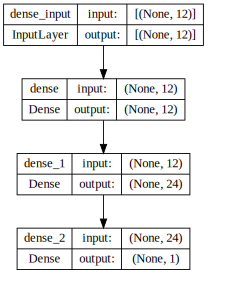

In [8]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
# 实现神经网络结构的图形化显示
SVG(model_to_dot(ann, show_shapes=True, dpi=65).create(prog='dot', format='svg'))

In [9]:
# 编译神经网络，指定优化器，损失函数以及评估指标
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

In [10]:
# 在对模型进行训练之前没有把训练样本和测试样本转化为 tensorflowh 和 Keras 可接受的数据类型
x_train=x_train.astype('float64')
x_test=x_test.astype('float64')

In [11]:
# 指定训练集，轮次，批量大小，验证集
history = ann.fit(x_train, y_train, epochs=30, batch_size=64,  validation_data=(x_test, y_test))   

Epoch 1/30
125/125 [==============================] - 3s 5ms/step - loss: 2403.5928 - acc: 0.6176 - val_loss: 14.0198 - val_acc: 0.6480
Epoch 2/30
125/125 [==============================] - 0s 4ms/step - loss: 20.5581 - acc: 0.6865 - val_loss: 40.7742 - val_acc: 0.6680
Epoch 3/30
125/125 [==============================] - 1s 4ms/step - loss: 29.6718 - acc: 0.6850 - val_loss: 14.9288 - val_acc: 0.6375
Epoch 4/30
125/125 [==============================] - 1s 4ms/step - loss: 28.8085 - acc: 0.6904 - val_loss: 25.8232 - val_acc: 0.3190
Epoch 5/30
125/125 [==============================] - 1s 4ms/step - loss: 22.0999 - acc: 0.6812 - val_loss: 57.8961 - val_acc: 0.7915
Epoch 6/30
125/125 [==============================] - 1s 4ms/step - loss: 33.7900 - acc: 0.6891 - val_loss: 18.7698 - val_acc: 0.4590
Epoch 7/30
125/125 [==============================] - 1s 5ms/step - loss: 29.6889 - acc: 0.6736 - val_loss: 31.6518 - val_acc: 0.7910
Epoch 8/30
125/125 [==============================] - 1s 5ms

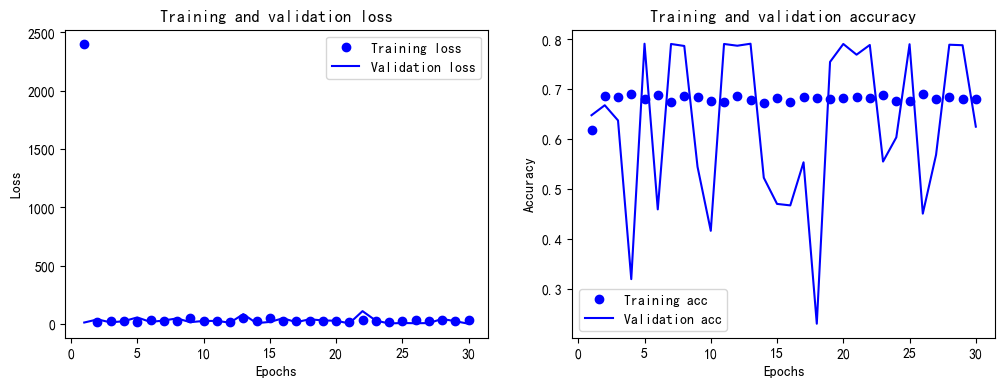

In [12]:
# 这段代码参考《Python深度学习》一书中的学习曲线的实现
def show_history(history): # 显示训练过程中的学习曲线
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
show_history(history) # 调用这个函数，并将神经网络训练历史数据作为参数输入

In [13]:
y_pred = ann.predict(x_test,batch_size=10) # 预测测试集的标签
y_pred = np.round(y_pred) # 四舍五入，将分类概率值转换成0/1整数值

200/200 [==============================] - 0s 2ms/step


In [14]:
from sklearn.metrics import classification_report # 导入分类报告
def show_report(X_test, y_test, y_pred): # 定义一个函数显示分类报告
    if y_test.shape != (2000,1):
        y_test = y_test.values # 把Panda series转换成Numpy array
        y_test = y_test.reshape((len(y_test),1)) # 转换成与y_pred相同的形状 
    print(classification_report(y_test,y_pred,labels=[0, 1])) #调用分类报告   

In [15]:
from sklearn.metrics import confusion_matrix # 导入混淆矩阵
def show_matrix(y_test, y_pred): # 定义一个函数显示混淆矩阵
    cm = confusion_matrix(y_test,y_pred) # 调用混淆矩阵
    plt.title("ANN Confusion Matrix") # 标题
    sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False) # 热力图设定
    plt.show() # 显示混淆矩阵

              precision    recall  f1-score   support

           0       0.82      0.72      0.77      1583
           1       0.27      0.39      0.32       417

    accuracy                           0.65      2000
   macro avg       0.54      0.56      0.54      2000
weighted avg       0.70      0.65      0.67      2000



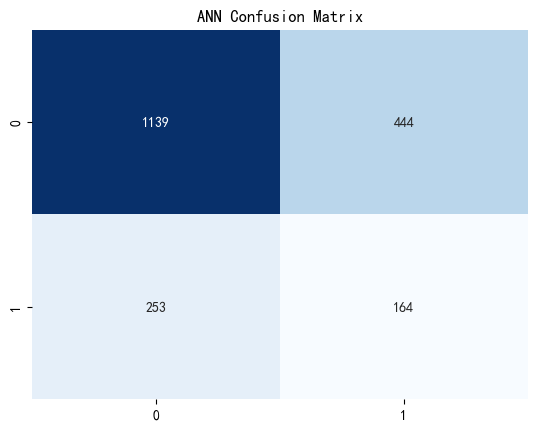

In [16]:
show_report(x_test, y_test, y_pred)
show_matrix(y_test, y_pred)

# 对数据集进行特征缩放

In [17]:
from sklearn.preprocessing import StandardScaler # 导入特征缩放器
sc = StandardScaler() # 特征缩放器
x_train = sc.fit_transform(x_train) # 拟合并应用于训练集
x_test = sc.transform (x_test) # 训练集结果应用于测试集

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() # 逻辑回归模型
history = lr.fit(x_train,y_train) # 训练机器
print("逻辑回归测试集准确率 {:.2f}%".format(lr.score(x_test,y_test)*100))

逻辑回归测试集准确率 80.50%


In [19]:
history = ann.fit(x_train, y_train, # 指定训练集
                  epochs=30,        # 指定训练的轮次
                  batch_size=64,    # 指定数据批量
                  validation_data=(x_test, y_test)) #指定验证集
y_pred = ann.predict(x_test,batch_size=10) # 预测测试集的标签
y_pred = np.round(y_pred) # 将分类概率值转换成0/1整数值

Epoch 1/30
125/125 [==============================] - 1s 7ms/step - loss: 0.4830 - acc: 0.7886 - val_loss: 0.4699 - val_acc: 0.7915
Epoch 2/30
125/125 [==============================] - 1s 6ms/step - loss: 0.4575 - acc: 0.7985 - val_loss: 0.4628 - val_acc: 0.7930
Epoch 3/30
125/125 [==============================] - 1s 5ms/step - loss: 0.4477 - acc: 0.8052 - val_loss: 0.4503 - val_acc: 0.8020
Epoch 4/30
125/125 [==============================] - 1s 5ms/step - loss: 0.4349 - acc: 0.8149 - val_loss: 0.4346 - val_acc: 0.8165
Epoch 5/30
125/125 [==============================] - 1s 6ms/step - loss: 0.4239 - acc: 0.8209 - val_loss: 0.4247 - val_acc: 0.8265
Epoch 6/30
125/125 [==============================] - 1s 5ms/step - loss: 0.4155 - acc: 0.8219 - val_loss: 0.4161 - val_acc: 0.8300
Epoch 7/30
125/125 [==============================] - 1s 5ms/step - loss: 0.4081 - acc: 0.8244 - val_loss: 0.4080 - val_acc: 0.8295
Epoch 8/30
125/125 [==============================] - 1s 5ms/step - loss: 0.

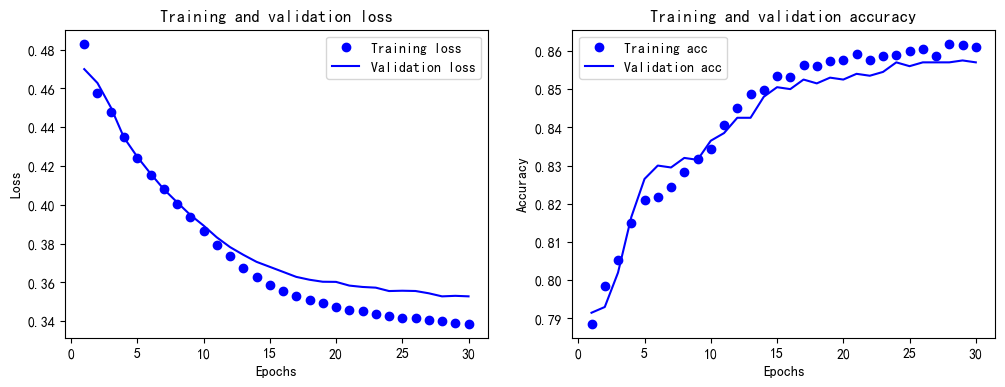

In [20]:
show_history(history) # 调用这个函数，并将神经网络训练历史数据作为参数输入

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1583
           1       0.75      0.47      0.58       417

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.84      2000



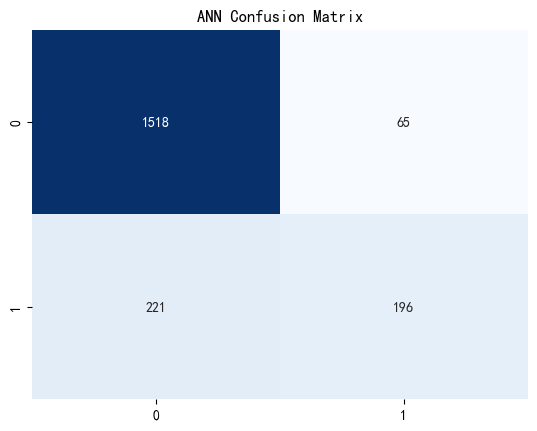

In [21]:
show_report(x_test, y_test, y_pred)
show_matrix(y_test, y_pred)

# 构建深度神经网络

In [22]:
ann = Sequential() # 创建一个序贯ANN模型
ann.add(Dense(units=12, input_dim=12, activation = 'relu')) # 添加输入层
ann.add(Dense(units=24, activation = 'relu')) # 添加隐层
ann.add(Dense(units=48, activation = 'relu')) # 添加隐层
ann.add(Dense(units=96, activation = 'relu')) # 添加隐层
ann.add(Dense(units=192, activation = 'relu')) # 添加隐层
ann.add(Dense(units=1, activation = 'sigmoid')) # 添加输出层
# 编译神经网络，指定优化器，损失函数，以及评估指标
ann.compile(optimizer = 'RMSprop', # 优化器
            loss = 'binary_crossentropy', # 损失函数
            metrics = ['acc']) # 评估指标
history = ann.fit(x_train, y_train, # 指定训练集
                  epochs=30,        # 指定训练的轮次
                  batch_size=64,    # 指定数据批量
                  validation_data=(x_test, y_test)) # 指定验证集
y_pred = ann.predict(x_test,batch_size=10) # 预测测试集的标签
y_pred = np.round(y_pred) # 将分类概率值转换成0/1整数值

Epoch 1/30
125/125 [==============================] - 2s 13ms/step - loss: 0.4641 - acc: 0.8044 - val_loss: 0.4378 - val_acc: 0.8220
Epoch 2/30
125/125 [==============================] - 1s 11ms/step - loss: 0.4207 - acc: 0.8214 - val_loss: 0.4084 - val_acc: 0.8370
Epoch 3/30
125/125 [==============================] - 1s 10ms/step - loss: 0.3929 - acc: 0.8340 - val_loss: 0.3907 - val_acc: 0.8430
Epoch 4/30
125/125 [==============================] - 1s 11ms/step - loss: 0.3749 - acc: 0.8422 - val_loss: 0.3849 - val_acc: 0.8445
Epoch 5/30
125/125 [==============================] - 1s 11ms/step - loss: 0.3622 - acc: 0.8482 - val_loss: 0.3692 - val_acc: 0.8535
Epoch 6/30
125/125 [==============================] - 1s 12ms/step - loss: 0.3559 - acc: 0.8509 - val_loss: 0.3696 - val_acc: 0.8515
Epoch 7/30
125/125 [==============================] - 1s 12ms/step - loss: 0.3481 - acc: 0.8562 - val_loss: 0.3699 - val_acc: 0.8485
Epoch 8/30
125/125 [==============================] - 1s 12ms/step - 

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1583
           1       0.78      0.37      0.50       417

    accuracy                           0.85      2000
   macro avg       0.82      0.67      0.71      2000
weighted avg       0.84      0.85      0.83      2000



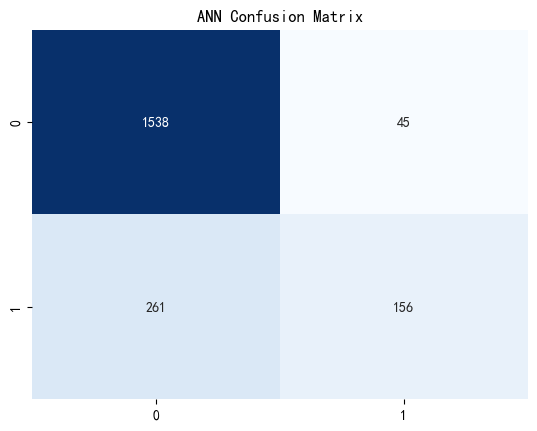

In [23]:
show_report(x_test, y_test, y_pred)
show_matrix(y_test, y_pred)

# 对深度神经网络添加dropout层

In [24]:
from keras.layers import Dropout # 导入Dropout
ann = Sequential() # 创建一个序贯ANN模型
ann.add(Dense(units=12, input_dim=12, activation = 'relu')) # 添加输入层
ann.add(Dense(units=24, activation = 'relu')) # 添加隐层
ann.add(Dropout(0.5)) # 添加Dropout
ann.add(Dense(units=48, activation = 'relu')) # 添加隐层
ann.add(Dropout(0.5)) # 添加Dropout
ann.add(Dense(units=96, activation = 'relu')) # 添加隐层
ann.add(Dropout(0.5)) # 添加Dropout
ann.add(Dense(units=192, activation = 'relu')) # 添加隐层
ann.add(Dropout(0.5)) # 添加Dropout
ann.add(Dense(units=1, activation = 'sigmoid')) # 添加输出层
ann.compile(optimizer = 'adam', # 优化器
              loss = 'binary_crossentropy', #损失函数 
              metrics = ['acc']) # 评估指标
history = ann.fit(x_train, y_train, epochs=30, batch_size=64, validation_data=(x_test, y_test))
y_pred = ann.predict(x_test,batch_size=10) # 预测测试集的标签
y_pred = np.round(y_pred) # 将分类概率值转换成0/1整数值

Epoch 1/30
125/125 [==============================] - 1s 9ms/step - loss: 0.5252 - acc: 0.7875 - val_loss: 0.5135 - val_acc: 0.7915
Epoch 2/30
125/125 [==============================] - 1s 9ms/step - loss: 0.4881 - acc: 0.7975 - val_loss: 0.4929 - val_acc: 0.7915
Epoch 3/30
125/125 [==============================] - 1s 8ms/step - loss: 0.4756 - acc: 0.7975 - val_loss: 0.5023 - val_acc: 0.7915
Epoch 4/30
125/125 [==============================] - 1s 8ms/step - loss: 0.4637 - acc: 0.7975 - val_loss: 0.4954 - val_acc: 0.7915
Epoch 5/30
125/125 [==============================] - 1s 8ms/step - loss: 0.4566 - acc: 0.7975 - val_loss: 0.4790 - val_acc: 0.7915
Epoch 6/30
125/125 [==============================] - 1s 8ms/step - loss: 0.4505 - acc: 0.7975 - val_loss: 0.4996 - val_acc: 0.7915
Epoch 7/30
125/125 [==============================] - 1s 8ms/step - loss: 0.4510 - acc: 0.7975 - val_loss: 0.4940 - val_acc: 0.7915
Epoch 8/30
125/125 [==============================] - 1s 8ms/step - loss: 0.

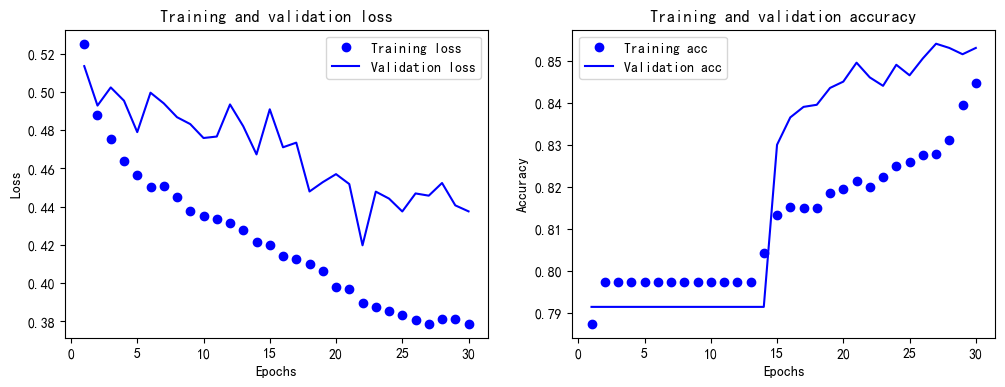

In [25]:
show_history(history) # 调用这个函数，并将神经网络训练历史数据作为参数输入

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1583
           1       0.74      0.46      0.56       417

    accuracy                           0.85      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



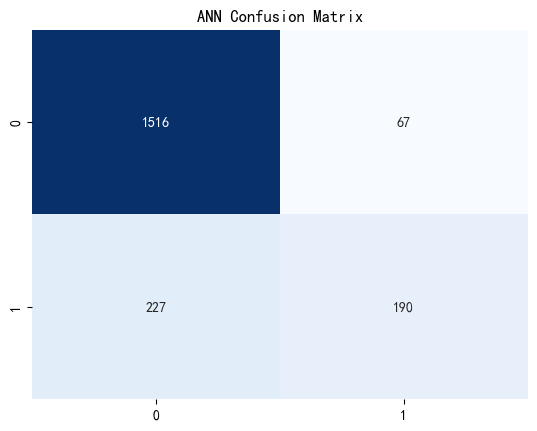

In [26]:
show_report(x_test, y_test, y_pred)
show_matrix(y_test, y_pred)

# 只提高recall不考虑precision

使用调整权重阈值的方法进行修正，即通过提高标签1权重阈值的方式，提高recall

In [27]:
myclass_weight = {0:1., 1:10.}  # 设置权重

In [28]:
from keras.layers import Dropout # 导入Dropout
ann = Sequential() # 创建一个序贯ANN模型
ann.add(Dense(units=12, input_dim=12, activation = 'relu')) # 添加输入层
ann.add(Dense(units=24, activation = 'relu')) # 添加隐层
ann.add(Dropout(0.5)) # 添加Dropout
ann.add(Dense(units=48, activation = 'relu')) # 添加隐层
ann.add(Dropout(0.5)) # 添加Dropout
ann.add(Dense(units=96, activation = 'relu')) # 添加隐层
ann.add(Dropout(0.5)) # 添加Dropout
ann.add(Dense(units=192, activation = 'relu')) # 添加隐层
ann.add(Dropout(0.5)) # 添加Dropout
ann.add(Dense(units=1, activation = 'sigmoid')) # 添加输出层
ann.compile(optimizer = 'adam', # 优化器
              loss = 'binary_crossentropy', #损失函数 
              metrics = ['acc']) # 评估指标
history = ann.fit(x_train, y_train, epochs=30, batch_size=64, validation_data=(x_test, y_test), class_weight= myclass_weight)
y_pred = ann.predict(x_test,batch_size=10) # 预测测试集的标签
y_pred = np.round(y_pred) # 将分类概率值转换成0/1整数值

Epoch 1/30
125/125 [==============================] - 1s 9ms/step - loss: 1.7843 - acc: 0.2291 - val_loss: 0.8844 - val_acc: 0.2085
Epoch 2/30
125/125 [==============================] - 1s 8ms/step - loss: 1.6668 - acc: 0.2061 - val_loss: 0.9207 - val_acc: 0.2085
Epoch 3/30
125/125 [==============================] - 1s 9ms/step - loss: 1.6203 - acc: 0.2065 - val_loss: 0.8913 - val_acc: 0.2085
Epoch 4/30
125/125 [==============================] - 1s 8ms/step - loss: 1.5493 - acc: 0.2419 - val_loss: 0.8280 - val_acc: 0.3060
Epoch 5/30
125/125 [==============================] - 1s 8ms/step - loss: 1.5053 - acc: 0.3070 - val_loss: 0.7639 - val_acc: 0.4875
Epoch 6/30
125/125 [==============================] - 1s 8ms/step - loss: 1.4452 - acc: 0.3909 - val_loss: 0.7287 - val_acc: 0.5405
Epoch 7/30
125/125 [==============================] - 1s 9ms/step - loss: 1.3961 - acc: 0.4498 - val_loss: 0.7017 - val_acc: 0.5910
Epoch 8/30
125/125 [==============================] - 1s 9ms/step - loss: 1.

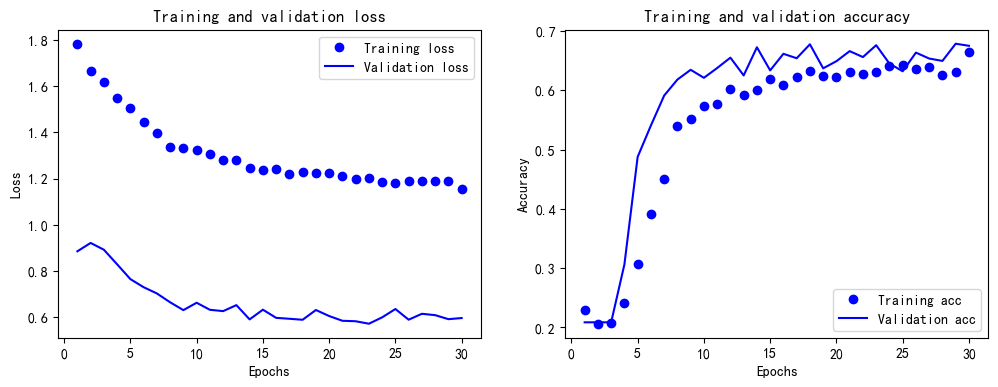

In [29]:
show_history(history) # 调用这个函数，并将神经网络训练历史数据作为参数输入

## 令人值得惊喜的是，由于权重阈值的改变，对于少数类即标签1来说，它的recall的值有了显著性的提升

              precision    recall  f1-score   support

           0       0.95      0.63      0.75      1583
           1       0.38      0.86      0.53       417

    accuracy                           0.68      2000
   macro avg       0.66      0.74      0.64      2000
weighted avg       0.83      0.68      0.71      2000



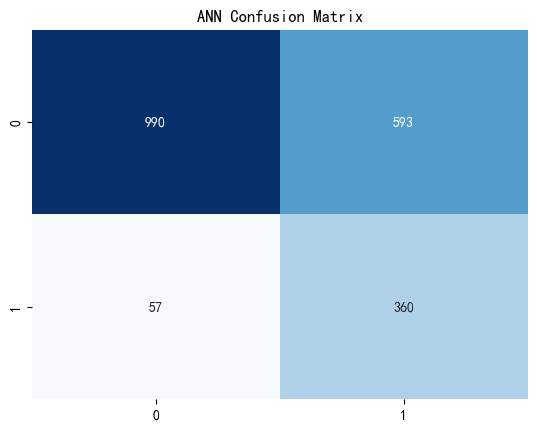

In [30]:
show_report(x_test, y_test, y_pred)
show_matrix(y_test, y_pred)